# Power spectrum plot
This notebook is the code for plotting the power spectrum using the powerbox package.

## Redshift z=0
The first cell..
* imports all the packages
* gets the snapshot, galaxy catalogue, galaxy positions (x,y,z) and the HI mass
* Additional variables can be pulled from the galaxy catalgue but these are the only ones needed for the PS.

In [1]:
# Power Spectrum plot
import matplotlib.pyplot as plt
import numpy as np
import powerbox as pbox
from Functions import *
from mpl_toolkits import mplot3d
from powerbox import get_power
from scipy import stats
import statistics
import pandas as pd

# Redshift = 0 
#get gals, snaps, sims_props
snapshot_used = 250 # z = 0
fname_in = "imapping_testrun/meraxes.hdf5"
h = meraxes.set_little_h(0.7)
gals, sim_props = meraxes.read_gals(fname_in, snapshot_used, sim_props=True, pandas=False)
#ngals = len(gals)
#print(ngals)
#gals.columns #returns all avaiable properties of galxies
#gals[gals.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]# remove infs
#gals.dropna()# drop nan values
snaplist = meraxes.io.read_snaplist(fname_in, h)    

# See other available Snaps and Redshifts
reds = snaplist[1]
snaps = snaplist[0]
print(reds)
print(snaps)

# using positions [x,y,x]
Pos = gals["Pos"]
pos_x = Pos[0]
pos_y = Pos[1]
pos_z = Pos[2]
HIMass = gals["HIMass"]

snaplist_index_used = list(snaplist[0]).index(snapshot_used)# convert to list and find the index of the snap we are using
redshift_used = snaplist[1][snaplist_index_used] # Get the redshift for corresponding snapshot
redshift_used = str(round(redshift_used, 1)) # round float to nearest whole int

[4.9999988  4.01575197 2.99733298 2.00100053 1.50871276 0.99933302
 0.50100094 0.        ]
[100 115 134 158 173 192 216 250]


## Calculates the HI weighted power spectrum for Redshift z=0
The full definition of this function is shown here, in case any additional parameters need to be added:

def get_power(deltax, boxlength, deltax2=None, N=None, a=1., b=1., remove_shotnoise=True,
              vol_normalised_power=True, bins=None, res_ndim=None, weights=None, weights2=None,
              dimensionless=True, bin_ave=True, get_variance=False, log_bins=False, ignore_zero_mode=False,
              k_weights = 1,
              ):

This function calculates the isotropic power spectrum of a given field, or cross-power of two similar fields.

This function, by default, conforms to typical cosmological power spectrum conventions -- normalising by the volume of the box and removing shot noise if applicable. These options are configurable.

### The steps of the function are as follows:
1. Check if the input data is in sampled particle format
2. Generate a histogram of the data, with appropriate number of bins (uses histogramdd)
3. Convert sampled data to mean-zero data
4. If input data is already a density field, just get the dimensions.
5. Calculate the n-D power spectrum and align it with the k from powerbox.
6. Determine a nice number of bins.
7. Set k_weights so that k=0 mode is ignore if desired.
8. res is (P, k, < var >)
9. Remove shot-noise

In [2]:
# REDSHIFT z=0
# GALAXY PS = gal_ps, gal_k
# HIMASS PS = HIMass_ps, HIMass_k
# (Pos, 100 ... where 100 is the box length
ps_gal, k_gal = pbox.get_power(Pos,100,remove_shotnoise=False,bins=100,weights=None)# NO WEIGHTS for GALAXY PS
ps_HIMass, k_HIMass = pbox.get_power(Pos,100,remove_shotnoise=False,bins=100,weights=HIMass)# WEIGHTS = HIMASS for HIMASS PS


### Plot Galaxy and HIMass Power spectrum WITH LOG SCALE

for z=0
No range has been specified.

NameError: name 'gal_k' is not defined

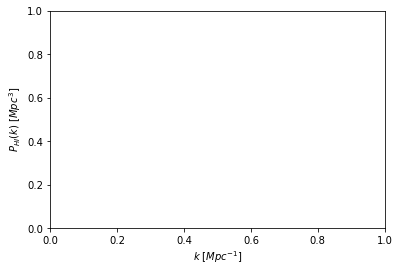

In [3]:
fig, ax = plt.subplots(1, 1)
label_z = ("z = " + redshift_used)
label_galsPS = ("Galaxy Power Spectrum")
label_HIMassPS = ("HI Mass Power Spectrum")
#ax.set_ylim([0,3500])
#ax.set_xlim([0.1,1])
ax.set_xlabel(r"$k$ $[Mpc^{-1}]$")
ax.set_ylabel(r"$P_{HI}(k)$ $[Mpc^{3}]$")
#plt.xscale('log')
#plt.yscale('log')
ax.plot(np.log10(gal_k),np.log10(gal_ps),color="black", label=label_galsPS)
ax.plot(np.log10(HIMass_k),np.log10(HIMass_ps),color="deepskyblue", label=label_HIMassPS)

plt.legend(title=("DRAGONS"),
           loc='upper right',
           fontsize=12)

name_of_plot=("PowerSpectrum_GALS_and_HIMass_unlogged")
plt.savefig("plots/" + name_of_plot + ".pdf")

fig, ax = plt.subplots(1, 1)
label_z = ("z = " + redshift_used)
ax.set_ylim([0,3500])
ax.set_xlim([0.1,1])
ax.set_xlabel(r"$k$ $[Mpc^{-1}]$")
ax.set_ylabel(r"$P_{HI}(k)$ $[Mpc^{3}]$")
#plt.xscale('log')
#plt.yscale('log')
ax.plot(khi,pkhi,color="black", label=label_z)

plt.legend(title=("DRAGONS"),
           loc='upper right',
           fontsize=12)

name_of_plot=("PowerSpectrum_test")
plt.savefig("plots/" + name_of_plot + ".pdf")

# Redshift = 1
#get gals, snaps, sims_props
snapshot_used_1 = 216 # z = 1
fname_in = "imapping_testrun/meraxes.hdf5"
h = meraxes.set_little_h(0.7)
gals_1, sim_props_1 = meraxes.read_gals(fname_in, snapshot_used_1, sim_props=True, pandas=False)
#ngals = len(gals)
#print(ngals)
#gals.columns #returns all avaiable properties of galxies
#gals[gals.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]# remove infs
#gals.dropna()# drop nan values
snaplist_1 = meraxes.io.read_snaplist(fname_in, h)    

# See other available Snaps and Redshifts
reds_1 = snaplist_1[1]
snaps_1 = snaplist_1[0]
print(reds_1)
print(snaps_1)

# using positions [x,y,x]
Pos_1 = gals_1["Pos"]
pos_x_1 = Pos_1[0]
pos_y_1 = Pos_1[1]
pos_z_1 = Pos_1[2]
HIMass_1 = gals_1["HIMass"]

snaplist_index_used_1 = list(snaplist_1[0]).index(snapshot_used_1)# convert to list and find the index of the snap we are using
redshift_used_1 = snaplist_4[1][snaplist_index_used_1] # Get the redshift for corresponding snapshot
redshift_used_1 = str(round(redshift_used_41, 1)) # round float to nearest whole int

#REDSHIFT z=1
# GALAXY PS = gal_ps, gal_k
# HIMASS PS = HIMass_ps, HIMass_k
gal_ps_1, gal_k_1 = pbox.get_power(Pos_1,100,remove_shotnoise=False,N=100,bins=100,weights=None) # NO WEIGHTS for GALAXY PS
HIMass_ps_1, HIMass_k_1 = pbox.get_power(Pos_1,100,remove_shotnoise=False,N=100,bins=100,weights=HIMass) # WEIGHTS = HIMASS for HIMASS PS

### Plot for the Power spectrum : NO LOG SCALE due to SET range
for both z=0 (black) and z=4 (pink)
The range has been set as x = (0.1 - 1 ) and y = (0,3500)

fig, ax = plt.subplots(1, 1)
label_z = ("z = " + redshift_used)
label_z_4 = ("z = " + redshift_used_4)
ax.set_ylim([0,3500])
ax.set_xlim([0.1,1])
ax.set_xlabel(r"$k$ $[Mpc^{-1}]$")
ax.set_ylabel(r"$P_{HI}(k)$ $[Mpc^{3}]$")
#plt.xscale('log')
#plt.yscale('log')
ax.plot(khi,pkhi,color="black", label=label_z)
ax.plot(khi_4,pkhi_4,color="mediumvioletred", label=label_z_4)

plt.legend(title=("DRAGONS"),
           loc='upper right',
           fontsize=12)

name_of_plot=("PowerSpectrum_test")
plt.savefig("plots/" + name_of_plot + ".pdf")